In [0]:
# Gender prediction is based on Naive Bayes Classifiction
# A littel grit on the Statistics could help to understand the problems even better 

# Women names are most common to end with vowels ---> An assumption
# NLTK can provide us names for our understanding and work around


In [5]:
import nltk
import random 
from nltk.corpus import names
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [7]:
# To look what is inside of the package
# we can use the fileids, which is like indexing the list 

names.fileids()

# There will be the collection of female names inside the female.txt
# There will be the collection of male names inside the male.txt

['female.txt', 'male.txt']

In [0]:
# For visualization

import matplotlib
import matplotlib.pyplot as plt 
matplotlib.style.use('ggplot')
%matplotlib inline

In [0]:
# for fileid in names.fileids():
#   for name in names.words(fileid):
#     print(fileid,name)

# The above code is better understanding of the for loop working in the python

# the above code could be collectively written as 


# [(fileid,name)for fileid in names.fileids() for name in  names.words(fileid)]

In [0]:
name_cfd=nltk.ConditionalFreqDist((fileid,name[-2:])for fileid in names.fileids() for name in  names.words(fileid))

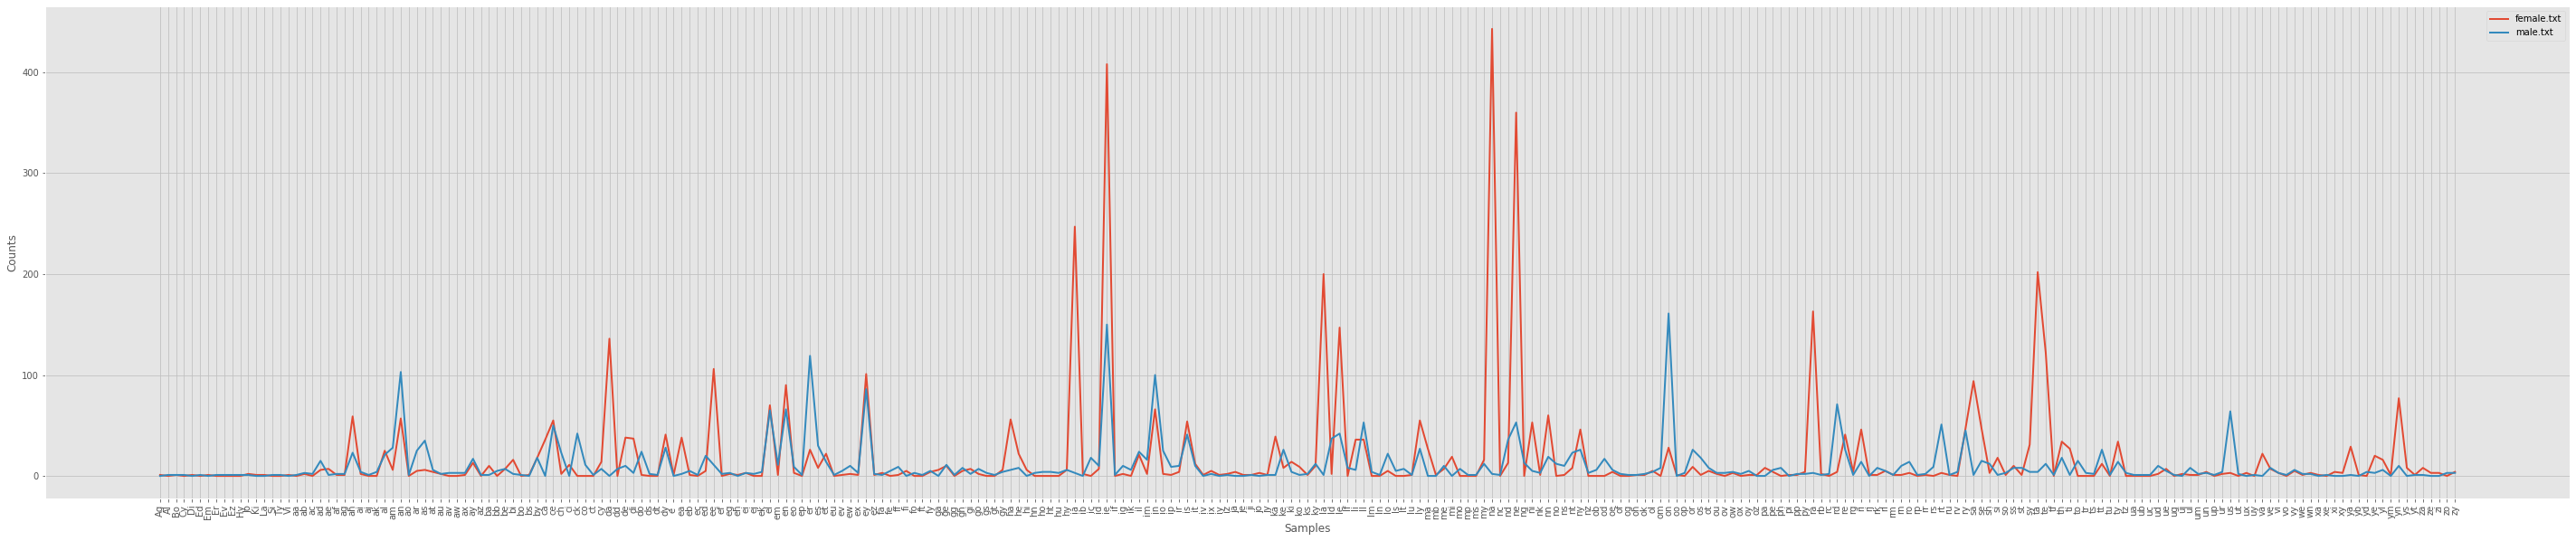

In [18]:
plt.figure(figsize = (50,10))
name_cfd.plot()

# The plot distribution compares the male and female files 
# with end two letters, we could find the frequency of occurance of males vs females
# the red graph denotes the female
# the blue graph denotes the male 

In [0]:
# with the function which is user defined 

def name_features(name):
  return {'pair': name[-2:]}

In [21]:
name_features('Aravindh')
# When we are manually passing the string or text inide the function, the result will be 
# as follows 

{'pair': 'dh'}

In [0]:
# [(name,'male')for name in names.words('male.txt')]
# [(name,'female')for name in names.words('female.txt')]

In [0]:
name_list = [(name,'male')for name in names.words('male.txt')] + [(name,'female') for name in names.words('female.txt')]
# Male and female words are concatenated over here

In [30]:
random.shuffle(name_list)
name_list[:10]

# Randomizing and shuffling process happens here 

[('Stu', 'male'),
 ('Mickie', 'female'),
 ('Rolfe', 'male'),
 ('Tann', 'male'),
 ('Sibbie', 'female'),
 ('Bjorn', 'male'),
 ('Gaby', 'female'),
 ('Paddie', 'male'),
 ('Shirlee', 'female'),
 ('Aylmer', 'male')]

In [0]:
features = [(name_features(name),gender)for (name,gender) in name_list]   # name_features() is used above

In [34]:
features[:10]

[({'pair': 'tu'}, 'male'),
 ({'pair': 'ie'}, 'female'),
 ({'pair': 'fe'}, 'male'),
 ({'pair': 'nn'}, 'male'),
 ({'pair': 'ie'}, 'female'),
 ({'pair': 'rn'}, 'male'),
 ({'pair': 'by'}, 'female'),
 ({'pair': 'ie'}, 'male'),
 ({'pair': 'ee'}, 'female'),
 ({'pair': 'er'}, 'male')]

In [35]:
len(features)/2

# To find the length of the features and splitting them into half

3972.0

In [0]:
training_set = features[:3972]
test_set = features[3972:]

 # training and test set creation 

In [0]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

# Classifier construction 

In [0]:
male_names = names.words('male.txt')

In [45]:
"Aravindh" in male_names

# Checking the name presence in male_names

False

In [48]:
classifier.classify(name_features('Prasad'))
# Partly classify the names based on the last two letter features 

# The classifier is having the functionality called classify 

'male'

In [50]:
nltk.classify.accuracy(classifier,test_set)

0.7781973816717019